# Fifth Session, Notebook # 10: Introduction to Astropy

## Today's agenda:
0. __Workshop Overview__:
    * __When__: August 16th  1pm-5pm
    * __Where__: American Museum of Natural History, Perkin Reading Room, located on the 5th floor of the Rose Center.
    * __What__: Today we will be practicing with Pandas!
    * __Want__ to lead a session for a topic? Some Days there will be small hack sessions for people to discuss problems they're working on.
    * __Online Resources__:  __https://daxfeliz.github.io/cunybridgebootcamp/__
    * __Program Schedule__: __https://tinyurl.com/mu88x9xc__
&nbsp;

1. __This session__:
* Useful functions of [Astropy](http://www.astropy.org/)
* Units
* Time
* Coordinates
* FITS files
* Analytic functions
* AstroPy Tables and different formats
</br>
&nbsp;

2. __Next session__:
    * Continuing with Astroquery! __Make sure you bring your laptop to this session and future sessions__.


# [Astropy](http://www.astropy.org/) is a package that is meant to provide a lot of basic functionality for astronomy work in Python

## This can be roughly broken up into two areas. One is astronomical calculations:  
## * unit and physical quantity conversions
## * physical constants specific to astronomy
## * celestial coordinate and time transformations

## The other is file type and structures:
## * FITS files, implementing the former standalone PyFITS interface
## * Virtual Observatory (VO) tables
## * common ASCII table formats, e.g. for online catalogues or data supplements of scientific publications
## * Hierarchical Data Format (HDF5) files

# `AstroPy` normallly comes with the Anaconda installation. But in case you happen to not have it installed it on your computer, you can simply do a 
```sh
    pip install --no-deps astropy
```

## You can always update it via 
```sh
    conda update astropy
```
## This is just a ``glimpse`` of all the features that `AstroPy` has:

<img src="./images/astropy_sections.png" alt="Astropy Features" width="600">




## For purposes of today, we'll focus just on what astropy can do for units, time, coordinates, image manipulation, and more.

In [7]:
# Importing Modules
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
sns.set_context("notebook")

In [8]:
import astropy
from astropy import units as u
from astropy.coordinates import SkyCoord
from astropy import constants as const

## Units

Astropy.units introduces units and allows for unit conversions. It doesn't, however, correctly handle spherical coordinates, but the astropy.coordinates package will address this later (see https://docs.astropy.org/en/stable/api/astropy.coordinates.SphericalRepresentation.html).

These units can be used to create objects that are made up of both a value and a unit, and basic math can be easily carried out with these. We can add the .unit and .value properties to get the units and numerical values, respectively.

In [9]:
d=42*u.meter
t=6*u.second
v=d/t
print (v)
print (v.unit)
print (v.value)

7.0 m / s
m / s
7.0


Astropy includes a large number of units, and this can include imperial units as well if desired by importing and enabling imperial units. The .find_equivalent_units() function will also return all the other units that are already defined in astropy. Below we do a quick list of the units that are defined for time and length units

In [10]:
from astropy.units import imperial
imperial.enable()
print( u.s.find_equivalent_units() )
print( u.m.find_equivalent_units() )

  Primary name | Unit definition | Aliases 
[
  a            | 3.15576e+07 s   | annum    ,
  d            | 86400 s         | day      ,
  fortnight    | 1.2096e+06 s    |          ,
  h            | 3600 s          | hour, hr ,
  min          | 60 s            | minute   ,
  s            | irreducible     | second   ,
  sday         | 86164.1 s       |          ,
  wk           | 604800 s        | week     ,
  yr           | 3.15576e+07 s   | year     ,
]
  Primary name | Unit definition | Aliases                         
[
  AU           | 1.49598e+11 m   | au, astronomical_unit            ,
  Angstrom     | 1e-10 m         | AA, angstrom                     ,
  cm           | 0.01 m          | centimeter                       ,
  earthRad     | 6.3781e+06 m    | R_earth, Rearth                  ,
  ft           | 0.3048 m        | foot                             ,
  fur          | 201.168 m       | furlong                          ,
  inch         | 0.0254 m        |              

The package also provides constants, with the units included. The full list of units can be found [here](http://docs.astropy.org/en/stable/constants/). We can take a quick look at c and G below, and see that these are objects which have value, uncertainty, and units.

In [11]:
print (const.c)
print (const.G)

  Name   = Speed of light in vacuum
  Value  = 299792458.0
  Uncertainty  = 0.0
  Unit  = m / s
  Reference = CODATA 2018
  Name   = Gravitational constant
  Value  = 6.6743e-11
  Uncertainty  = 1.5e-15
  Unit  = m3 / (kg s2)
  Reference = CODATA 2018


Astropy has an aditional function that will allow for unit conversions. So we can, for example, create an object that is the distance to Mars, and then convert that to kilometers or miles. A brief note is that if you try to convert a pure unit (like the 4th line below) into another unit, you'll get a unitless value representing the conversion between the two.

This can also be used to convert constants into other units, so we can convert the speed of light to the somewhat useful pc/yr or the entirely unuseful furlong/fortnight

In [12]:
Mars=1.5*u.AU
print (Mars.to('kilometer'))
print (Mars.to('mile'))
print (u.AU.to('km')) #can use abbreviation for some units
print (const.c.to('pc/yr')) # speed of light in m/s to pc/year

224396806.04999998 km
139433710.9095383 mi
149597870.7
0.30660139378555057 pc / yr


To use this more practically, we can calculate the time it will take for light to reach the earth just by dividing 1 AU by the speed of light, as done below. Since AU is a unit, and c is in m/s, we end up with an answer that is (AU\*m/s). By using .decompose() we can simplify that expression, which in this case will end up with an answer that is just in seconds. Finally, we can then convert that answer to minutes to get the answer of about 8 1/3 minutes that is commonly used. None of this required our doing the conversions where we might've slipped up.

In [13]:
time=1*u.AU/const.c
print(time)

time_s=time.decompose()
print(time_s)

time_min=time_s.to(u.minute)
print(time_min)

3.3356409519815204e-09 AU s / m
499.0047838361564 s
8.316746397269274 min


## Time

Astropy handles time in a similar way to units, with creating Time objects. These objects have two main properties.  
The format is simply how the time is displayed. This is the difference between, for example, Julian Date, Modified Julian Date, and ISO time (YYYY-MM-DD HH:MM:SS). The second is the scale, and is the difference between terrestrial time vs time at the barycenter of the solar system.

We can start off by changing a time from one format to many others. We can also subtract times and we will get a timedelta unit.

In [14]:
from astropy.time import Time
t=Time(57867.346424, format='mjd', scale='utc')
t1=Time(58867.346424, format='mjd', scale='utc')
print (t.mjd)
print (t.iso)
print (t.jyear)
print(t1-t)

57867.346424
2017-04-24 08:18:51.034
2017.3110100588638
1000.0


## Coordinates

Coordinates again work by using an object time defined for this purpose. We can establish a point in the ICRS frame (this is approximately the equatorial coordinate) by defining the ra and dec. Note that here we are using u.degree in specifying the coordinates in a "SkyCoord" object.

We can then print out the RA and dec, as well as change the units displayed. In the last line, we can also convert from ICRS equatorial coordinates to galactic coordinates.

In [15]:
c = SkyCoord(ra=10.68458*u.degree, dec=41.26917*u.degree, frame='icrs')
print (c)
print (c.ra)
print (c.dec)
print (c.ra.hour)
print (c.ra.hms)
print (c.galactic)

<SkyCoord (ICRS): (ra, dec) in deg
    (10.68458, 41.26917)>
10d41m04.488s
41d16m09.012s
0.7123053333333335
hms_tuple(h=0.0, m=42.0, s=44.299200000000525)
<SkyCoord (Galactic): (l, b) in deg
    (121.17424181, -21.57288557)>


## Slightly practical application of this

Using some of these astropy functions, we can do some fancier applications. Starting off, we import a listing of stars with RA and dec from the attached table, and store them in the coordinate formats that are used by astropy. We then use matplotlib to plot this, and are able to easily convert them into radians thanks to astropy. This plot is accurate, but it lacks reference for where these points are.

# let's create a map of exoplanets from the NASA Exoplanet Archive (https://exoplanetarchive.ipac.caltech.edu/)

In [40]:
# first, let's download the data from the website and turn it into a pandas dataframe

import pandas as pd
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
pd.set_option('display.max_colwidth', None)

#we're going to get a list of exoplanets that transit their host stars (tran_flag = 1)
nasa_url = "https://exoplanetarchive.ipac.caltech.edu/TAP/sync?query=select+*+from+ps+where+tran_flag+=+1+order+by+pl_name+desc+&format=csv"

# read in data from URL (this can take a minute or two to download)
# data = pd.read_csv(nasa_url,sep=',', comment='#')
# # save data to file
# data.to_csv('exoplanets.csv',index=False)

#uncomment lines above if you want most recent exoplanet catalog data

# read in data from file
data = pd.read_csv('exoplanets.csv')




/var/folders/qb/9tctyb8566b3ws5ypfbmqq8r0000gn/T/ipykernel_3124/2711226136.py:20: DtypeWarning: Columns (3,4,35,50,65,148,153,183,206,211,237,242,257) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv('exoplanets.csv')


In [41]:
# remove duplicate star systems
data = data.drop_duplicates(subset='hostname', keep="first")
print('Number of transiting exoplanet star systems: ',len(data))

Number of transiting exoplanet star systems:  3255


In [18]:
# let's look at the first few rows
data.head(3)

,pl_name,pl_letter,hostname,hd_name,hip_name,tic_id,gaia_id,default_flag,pl_refname,sy_refname,disc_pubdate,disc_year,discoverymethod,disc_locale,disc_facility,disc_instrument,disc_telescope,disc_refname,ra,rastr,dec,decstr,glon,glat,elon,elat,pl_orbper,pl_orbpererr1,pl_orbpererr2,pl_orbperlim,pl_orbperstr,pl_orblpererr1,pl_orblper,pl_orblpererr2,pl_orblperlim,pl_orblperstr,pl_orbsmax,pl_orbsmaxerr1,pl_orbsmaxerr2,pl_orbsmaxlim,pl_orbsmaxstr,pl_orbincl,pl_orbinclerr1,pl_orbinclerr2,pl_orbincllim,pl_orbinclstr,pl_orbtper,pl_orbtpererr1,pl_orbtpererr2,pl_orbtperlim,pl_orbtperstr,pl_orbeccen,pl_orbeccenerr1,pl_orbeccenerr2,pl_orbeccenlim,pl_orbeccenstr,pl_eqt,pl_eqterr1,pl_eqterr2,pl_eqtlim,pl_eqtstr,pl_occdep,pl_occdeperr1,pl_occdeperr2,pl_occdeplim,pl_occdepstr,pl_insol,pl_insolerr1,pl_insolerr2,pl_insollim,pl_insolstr,pl_dens,pl_denserr1,pl_denserr2,pl_denslim,pl_densstr,pl_trandep,pl_trandeperr1,pl_trandeperr2,pl_trandeplim,pl_trandepstr,pl_tranmid,pl_tranmiderr1,pl_tranmiderr2,pl_tranmidlim,pl_tranmidstr,pl_trandur,pl_trandurerr1,pl_trandurerr2,pl_trandurlim,pl_trandurstr,sy_kmagstr,sy_umag,sy_umagerr1,sy_umagerr2,sy_umagstr,sy_rmag,sy_rmagerr1,sy_rmagerr2,sy_rmagstr,sy_imag,sy_imagerr1,sy_imagerr2,sy_imagstr,sy_zmag,sy_zmagerr1,sy_zmagerr2,sy_zmagstr,sy_w1mag,sy_w1magerr1,sy_w1magerr2,sy_w1magstr,sy_w2mag,sy_w2magerr1,sy_w2magerr2,sy_w2magstr,sy_w3mag,sy_w3magerr1,sy_w3magerr2,sy_w3magstr,sy_w4mag,sy_w4magerr1,sy_w4magerr2,sy_w4magstr,sy_gmag,sy_gmagerr1,sy_gmagerr2,sy_gmagstr,sy_gaiamag,sy_gaiamagerr1,sy_gaiamagerr2,sy_gaiamagstr,sy_tmag,sy_tmagerr1,sy_tmagerr2,sy_tmagstr,pl_controv_flag,pl_tsystemref,st_metratio,st_spectype,sy_kepmag,sy_kepmagerr1,sy_kepmagerr2,sy_kepmagstr,st_rotp,st_rotperr1,st_rotperr2,st_rotplim,st_rotpstr,pl_projobliq,pl_projobliqerr1,pl_projobliqerr2,pl_projobliqlim,pl_projobliqstr,x,y,z,htm20,pl_rvamp,pl_rvamperr1,pl_rvamperr2,pl_rvamplim,pl_rvampstr,pl_radj,pl_radjerr1,pl_radjerr2,pl_radjlim,pl_radjstr,pl_rade,pl_radeerr1,pl_radeerr2,pl_radelim,pl_radestr,pl_ratror,pl_ratrorerr1,pl_ratrorerr2,pl_ratrorlim,pl_ratrorstr,pl_ratdor,pl_trueobliq,pl_trueobliqerr1,pl_trueobliqerr2,pl_trueobliqlim,pl_trueobliqstr,sy_icmag,sy_icmagerr1,sy_icmagerr2,sy_icmagstr,rowupdate,pl_pubdate,st_refname,releasedate,dkin_flag,pl_ratdorerr1,pl_ratdorerr2,pl_ratdorlim,pl_ratdorstr,pl_imppar,pl_impparerr1,pl_impparerr2,pl_impparlim,pl_impparstr,pl_cmassj,pl_cmassjerr1,pl_cmassjerr2,pl_cmassjlim,pl_cmassjstr,pl_cmasse,pl_cmasseerr1,pl_cmasseerr2,pl_cmasselim,pl_cmassestr,pl_massj,pl_massjerr1,pl_massjerr2,pl_massjlim,pl_massjstr,pl_masse,pl_masseerr1,pl_masseerr2,pl_masselim,pl_massestr,pl_bmassj,pl_bmassjerr1,pl_bmassjerr2,pl_bmassjlim,pl_bmassjstr,pl_bmasse,pl_bmasseerr1,pl_bmasseerr2,pl_bmasselim,pl_bmassestr,pl_bmassprov,pl_msinij,pl_msinijerr1,pl_msinijerr2,pl_msinijlim,pl_msinijstr,pl_msinie,pl_msinieerr1,pl_msinieerr2,pl_msinielim,pl_msiniestr,st_teff,st_tefferr1,st_tefferr2,st_tefflim,st_teffstr,st_met,st_meterr1,st_meterr2,st_metlim,st_metstr,st_radv,st_radverr1,st_radverr2,st_radvlim,st_radvstr,st_vsin,st_vsinerr1,st_vsinerr2,st_vsinlim,st_vsinstr,st_lum,st_lumerr1,st_lumerr2,st_lumlim,st_lumstr,st_logg,st_loggerr1,st_loggerr2,st_logglim,st_loggstr,st_age,st_ageerr1,st_ageerr2,st_agelim,st_agestr,st_mass,st_masserr1,st_masserr2,st_masslim,st_massstr,st_dens,st_denserr1,st_denserr2,st_denslim,st_densstr,st_rad,st_raderr1,st_raderr2,st_radlim,st_radstr,ttv_flag,ptv_flag,tran_flag,rv_flag,ast_flag,obm_flag,micro_flag,etv_flag,ima_flag,pul_flag,soltype,sy_snum,sy_pnum,sy_mnum,cb_flag,st_nphot,st_nrvc,st_nspec,pl_nespec,pl_ntranspec,pl_nnotes,sy_pm,sy_pmerr1,sy_pmerr2,sy_pmstr,sy_pmra,sy_pmraerr1,sy_pmraerr2,sy_pmrastr,sy_pmdec,sy_pmdecerr1,sy_pmdecerr2,sy_pmdecstr,sy_plx,sy_plxerr1,sy_plxerr2,sy_plxstr,sy_dist,sy_disterr1,sy_disterr2,sy_diststr,sy_bmag,sy_bmagerr1,sy_bmagerr2,sy_bmagstr,sy_vmag,sy_vmagerr1,sy_vmagerr2,sy_vmagstr,sy_jmag,sy_jmagerr1,sy_jmagerr2,sy_jmagstr,sy_hmag,sy_hmagerr1,sy_hmagerr2,sy_hmagstr,sy_

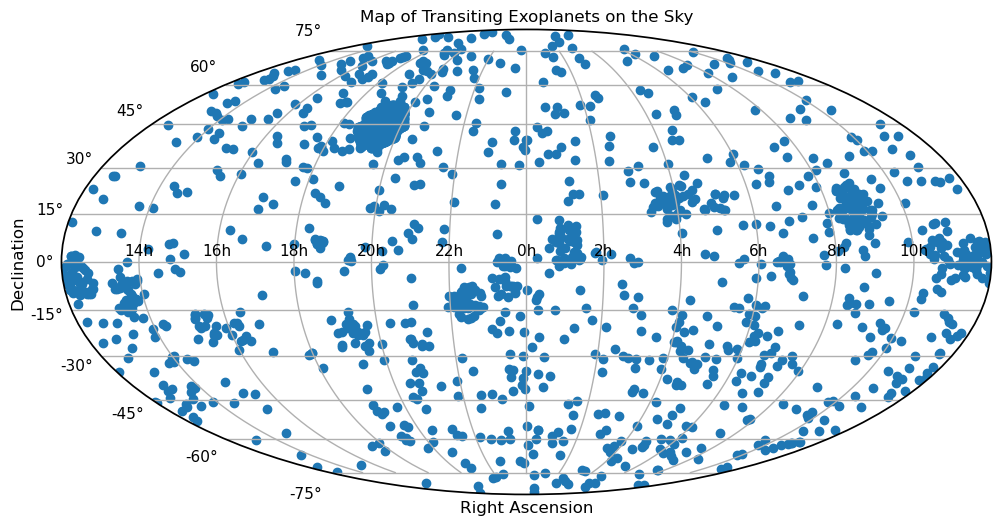

In [42]:


import astropy.units as u
import astropy.coordinates as coord
from astropy.coordinates import SkyCoord
ra = coord.Angle(np.array(data['ra'])*u.degree)
ra = ra.wrap_at(180*u.degree)
dec = coord.Angle(np.array(data['dec'])*u.degree)

fig = plt.figure(figsize=(12,8))
ax = fig.add_subplot(111, projection="mollweide")
plt.title('Map of Transiting Exoplanets on the Sky')
ax.scatter(ra.radian, dec.radian)
ax.set_xticklabels(['14h','16h','18h','20h','22h','0h','2h','4h','6h','8h','10h'])
ax.set_ylabel('Declination')
ax.set_xlabel('Right Ascension')
ax.grid(True)
plt.show()

To fix this, we will add some references to this by adding a few more sets of data points. The first is relatively simple, we put in a line at the celestial equator. This just has to be a set of points that are all at declination of 0, and from -180 to +180 degrees in RA. These are a and b in the below cell.

We also want to add the planes of the ecliptic and the galaxy on this. For both, we use coordinate objects and provide numpy arrays where one coordinate is at zero, and the other goes from 0 to 360. With astropy we can then easily convert from each coordinate system to ICRS. There's some for loops to modify the plotting, but the important thing is that this will give us a plot that has not just the locations of all the planets that we've plotted, but will also include the celestial equator, galactic plane, and ecliptic plane on it.

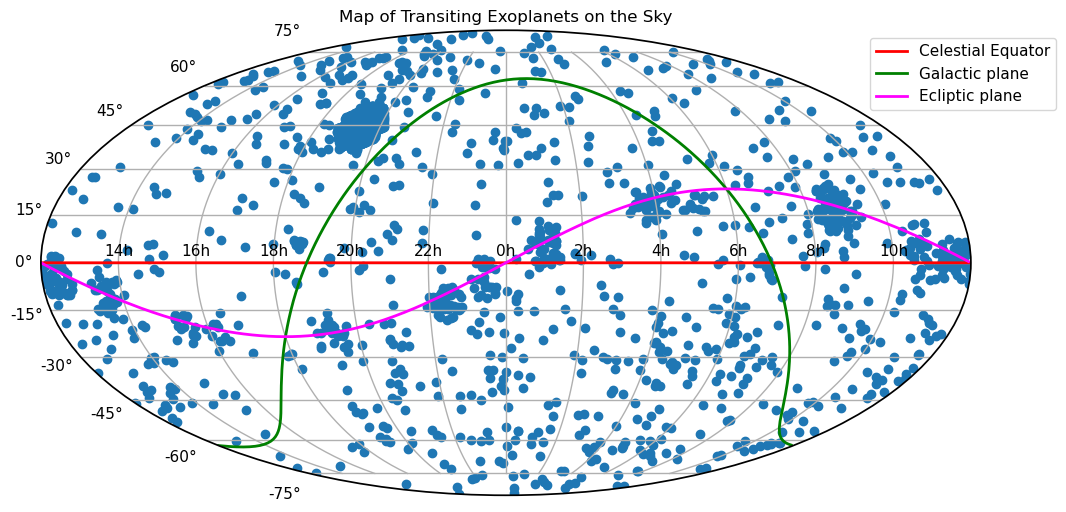

In [20]:
#celestial equator coordinates
a=coord.Angle((np.arange(361)-180)*u.degree)
b=coord.Angle(np.zeros(len(a))*u.degree)

numpoints=360

galaxy=SkyCoord(l=coord.Angle((np.arange(numpoints))*u.degree), 
                b=coord.Angle(np.zeros(numpoints)*u.degree), 
                frame='galactic')

gal_eq=galaxy.icrs

ecliptic=SkyCoord(lon=coord.Angle((np.arange(numpoints))*u.degree), 
                  lat=coord.Angle(np.zeros(numpoints)*u.degree), 
                  frame='geocentrictrueecliptic')

ecl_eq=ecliptic.icrs



fixed_ra=[]
for item in gal_eq.ra.radian:
    if item < np.pi:
        fixed_ra.append(item)
    else:
        fixed_ra.append(item-2*np.pi)
i=np.argmin(fixed_ra)

fixed_dec=[x for x in gal_eq.dec.radian]

fixed_ra_eq=[]
for item in ecl_eq.ra.radian:
    if item < np.pi:
        fixed_ra_eq.append(item)
    else:
        fixed_ra_eq.append(item-2*np.pi)
j=np.argmin(fixed_ra_eq)

fixed_dec_eq=[x for x in ecl_eq.dec.radian]

fig = plt.figure(figsize=(12,8))
ax = fig.add_subplot(111, projection="mollweide")
plt.title('Map of Transiting Exoplanets on the Sky')
ax.scatter(ra.radian, dec.radian)
ax.plot(a.radian, b.radian, color='r', lw=2,label='Celestial Equator')
ax.plot(fixed_ra[i:]+fixed_ra[:i], fixed_dec[i:]+fixed_dec[:i], color='green', lw=2,label='Galactic plane') 
ax.plot(fixed_ra_eq[j:]+fixed_ra_eq[:j], fixed_dec_eq[j:]+fixed_dec_eq[:j], color='magenta', lw=2,label='Ecliptic plane') 
ax.set_xticklabels(['14h','16h','18h','20h','22h','0h','2h','4h','6h','8h','10h'])
ax.grid(True)
ax.legend(loc='upper right',bbox_to_anchor=[1.1, 1]) #bbox_to_anchor places legend outside subplot
plt.show()

# Reading in FITS files

One of the useful things with `Astropy` is that you can use it for reading in FITS files, and extracting info such as bands, exposure times, intrument information, etc.

In this example, we will read in a FITS image file, and extract its information

In [21]:
from astroquery.esa.hubble import ESAHubble
esahubble = ESAHubble()

from astroquery.mast import Observations

obs = Observations.query_criteria(
        objectname="NGC 7496", 
        radius="10s", 
        obs_collection="HST"
        )
print('Number of matching observations: {}'.format(len(obs)))
obs

Number of matching observations: 45


<Table masked=True length=45>
 intentType obs_collection provenance_name ...   objID     objID1  distance
   str11         str3            str8      ...    str9      str9   float64 
----------- -------------- --------------- ... --------- --------- --------
    science            HST          CALNIC ... 124901607 124901607      0.0
calibration            HST          CALACS ... 133151306 133151306      0.0
    science            HST         HAP-MVM ... 367007062 367007062      0.0
    science            HST         HAP-MVM ... 367007065 367007065      0.0
    science            HST         HAP-MVM ... 367007072 367007072      0.0
    science            HST         HAP-MVM ... 367007074 367007074      0.0
        ...            ...             ... ...       ...       ...      ...
    science            HST         HAP-SVM ... 380721560 380721560      0.0
    science            HST        CALWFPC2 ... 385003713 385003713      0.0
    science            HST        CALWFPC2 ... 386056801 386056801      0.0
    science            HST         HAP-SVM ... 401605305 401605305      0.0
    science            HST         HAP-SVM ... 401605341 401605341      0.0
    science            HST         HAP-MVM ... 401928036 401928036      0.0
    science            HST         HAP-MVM ... 402351396 402351396      0.0

In [22]:
data_products = Observations.get_product_list(obs)
data_products = data_products[(data_products['productType']=='SCIENCE') & (data_products['calib_level']>=3)]
print('Number of science products',len(data_products))
print('')
manifest = Observations.download_products(data_products[1]) #just get 1 science product, you can get more if you want!
manifest = Observations.download_products(data_products[3])

Number of science products 347

INFO: Found cached file ./mastDownload/HLA/hst_08597_71_wfpc2_f606w_wf/hst_08597_71_wfpc2_f606w_wf_drz.fits with expected size 50503680. [astroquery.query]
INFO: Found cached file ./mastDownload/HLA/hst_08597_71_wfpc2_total_wf/hst_08597_71_wfpc2_total_wf_drz.fits with expected size 50503680. [astroquery.query]


In [23]:
data_products.to_pandas().head(10)


,obsID,obs_collection,dataproduct_type,obs_id,description,type,dataURI,productType,productGroupDescription,productSubGroupDescription,productDocumentationURL,project,prvversion,proposal_id,productFilename,size,parent_obsid,dataRights,calib_level,filters
0,25639843,HLA,image,hst_08597_71_wfpc2_f606w_pc,HLA simple fits science image,C,mast:HLA/url/cgi-bin/getdata.cgi?dataset=hst_08597_71_wfpc2_f606w_pc_drz.fits,SCIENCE,NaN,DRZ,NaN,HLA,NaN,8597,hst_08597_71_wfpc2_f606w_pc_drz.fits,12061440,24636987,PUBLIC,3,F606W
1,25639844,HLA,image,hst_08597_71_wfpc2_f606w_wf,HLA simple fits science image,C,mast:HLA/url/cgi-bin/getdata.cgi?dataset=hst_08597_71_wfpc2_f606w_wf_drz.fits,SCIENCE,NaN,DRZ,NaN,HLA,NaN,8597,hst_08597_71_wfpc2_f606w_wf_drz.fits,50503680,24636987,PUBLIC,3,F606W
2,25639845,HLA,image,hst_08597_71_wfpc2_total_pc,HLA simple fits science image,C,mast:HLA/url/cgi-bin/getdata.cgi?dataset=hst_08597_71_wfpc2_total_pc_drz.fits,SCIENCE,NaN,DRZ,NaN,HLA,NaN,8597,hst_08597_71_wfpc2_total_pc_drz.fits,12061440,24636988,PUBLIC,3,DETECTION
3,25639846,HLA,image,hst_08597_71_wfpc2_total_wf,HLA simple fits science image,C,mast:HLA/url/cgi-bin/getdata.cgi?dataset=hst_08597_71_wfpc2_total_wf_drz.fits,SCIENCE,NaN,DRZ,NaN,HLA,NaN,8597,hst_08597_71_wfpc2_total_wf_drz.fits,50503680,24636988,PUBLIC,3,DETECTION
4,25770828,HLA,image,HST_7330_27_NIC_NIC2_F160W,HLA simple fits science image,C,mast:HLA/url/cgi-bin/getdata.cgi?dataset=HST_7330_27_NIC_NIC2_F160W_drz.fits,SCIENCE,NaN,DRZ,NaN,HLA,NaN,7330,HST_7330_27_NIC_NIC2_F160W_drz.fits,3824640,24848018,PUBLIC,3,F160W
5,24636987,HST,image,u67n7101r,DADS DRW file,S,mast:HST/product/u67n7101r_drw.fits,SCIENCE,Minimum Recommended Products,DRW,NaN,CALWFPC2,"2.5.3 (Sep 4, 2008)",8597,u67n7101r_drw.fits,235598400,24636987,PUBLIC,3,F606W
6,24636987,HST,image,u67n7101r,DADS DRW file,S,mast:HST/product/u67n7101r_drw.fits,SCIENCE,Minimum Recommended Products,DRW,NaN,CALWFPC2,"2.5.3 (Sep 4, 2008)",8597,u67n7101r_drw.fits,235598400,207605339,PUBLIC,3,F606W
7,24636987,HST,image,u67n7101r,DADS DRW file,S,mast:HST/product/u67n7101r_drw.fits,SCIENCE,Minimum Recommended Products,DRW,NaN,CALWFPC2,"2.5.3 (Sep 4, 2008)",8597,u67n7101r_drw.fits,235598400,207611962,PUBLIC,3,F606W
8,24636988,HST,image,u67n7102r,DADS DRW file,S,mast:HST/product/u67n7102r_drw.fits,SCIENCE,Minimum Recommended Products,DRW,NaN,CALWFPC2,"2.5.3 (Sep 4, 2008)",8597,u67n7102r_drw.fits,235546560,24636988,PUBLIC,3,F606W
9,24636988,HST,image,u67n7102r,DADS DRW file,S,mast:HST/product/u67n7102r_drw.fits,SCIENCE,Minimum Recommended Products,DRW,NaN,CALWFPC2,"2.5.3 (Sep 4, 2008)",8597,u67n7102r_drw.fits,235546560,207605339,PUBLIC,3,F606W


# look in your current working directory, you'll now see that there is a new directory:

In [24]:
import os
mast_dir =os.getcwd()+'/mastDownload/'

# let's read in one of the fits files we downloaded from HST

from astropy.io import fits
filename=mast_dir+'HLA/hst_08597_71_wfpc2_f606w_wf/hst_08597_71_wfpc2_f606w_wf_drz.fits'
hdu = fits.open(filename)

The returned object, hdulist, (an instance of the [HDUList](http://docs.astropy.org/en/stable/io/fits/api/hdulists.html#hdulist) class) behaves like a Python list, and each element maps to a Header-Data Unit (HDU) in the FITS file. You can view more information about the FITS file with:

In [25]:
hdu.info()

Filename: /Users/daxfeliz/Desktop/cunybridgebootcamp/current_and_past_sites/2024_notebooks/Session_05/mastDownload/HLA/hst_08597_71_wfpc2_f606w_wf/hst_08597_71_wfpc2_f606w_wf_drz.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU     490   ()      
  1  SCI           1 ImageHDU       103   (2050, 2050)   float32   
  2  WHT           1 ImageHDU       124   (2050, 2050)   float32   
  3  CTX           1 ImageHDU       123   (2050, 2050)   int32   


As we can see, this file contains a few HDUs. The first contains the primary HDU, which contains the information about the data. The second hdu is the image data. 

To read the header of the FITS file, you can read __`hdulist`__. The following shows the different keys for the header

In [26]:
hdu[0].header

SIMPLE  =                    T / conforms to FITS standard                      
BITPIX  =                    8 / array data type                                
NAXIS   =                    0 / number of array dimensions                     
EXTEND  =                    T                                                  
DATE    = '2009-11-11'         / date this file was written (yyyy-mm-dd)        
FILETYPE= 'SCI      '          / type of data found in data file                
                                                                                
TELESCOP= 'HST'                / telescope used to acquire data                 
INSTRUME= 'WFPC2 '             / identifier for instrument used to acquire data 
EQUINOX =               2000.0 / equinox of celestial coord. system             
                                                                                
              / WFPC-II DATA DESCRIPTOR KEYWORDS                                
                            

Let's look at the image of the FITS file.
The hdu object then has two important attributes: data, which behaves like a Numpy array, can be used to access the data, and header, which behaves like a dictionary, can be used to access the header information. First, we can take a look at the data:

In [27]:
hdu[1].data.shape

(2050, 2050)

This tells us that it is a 2050-by-2050 pixel image. Lets look at the header for the image data:

In [28]:
hdu[1].header

XTENSION= 'IMAGE   '           / Image extension                                
BITPIX  =                  -32 / array data type                                
NAXIS   =                    2 / number of array dimensions                     
NAXIS1  =                 2050                                                  
NAXIS2  =                 2050                                                  
PCOUNT  =                    0 / number of parameters                           
GCOUNT  =                    1 / number of groups                               
CRVAL1  =       347.4494560575 / right ascension of reference pixel (deg)       
CRVAL2  =   -43.43870153027779 / declination of reference pixel (deg)           
CRPIX1  =               1025.0 / x-coordinate of reference pixel                
CRPIX2  =               1025.0 / y-coordinate of reference pixel                
CD1_1   = -2.777777777777778E-05 / partial of the right ascension w.r.t. x      
CD1_2   =                  0

We can access individual header keywords using standard item notation:

In [29]:
hdu[1].header['PHOTMODE']

'WFPC2,1,A2D7,F606W,,CAL'

We can plot the image using matplotlib:

<class 'numpy.ndarray'>
(2050, 2050)
WCS Keywords

Number of WCS axes: 2
CTYPE : 'RA---TAN'  'DEC--TAN'  
CRVAL : 347.4494560575  -43.43870153027779  
CRPIX : 1025.0  1025.0  
CD1_1 CD1_2  : -2.777777777777778e-05  0.0  
CD2_1 CD2_2  : 0.0  2.777777777777778e-05  
NAXIS : 2050  2050


/var/folders/qb/9tctyb8566b3ws5ypfbmqq8r0000gn/T/ipykernel_3124/3158886505.py:30: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations.
  fig.tight_layout(pad=1)


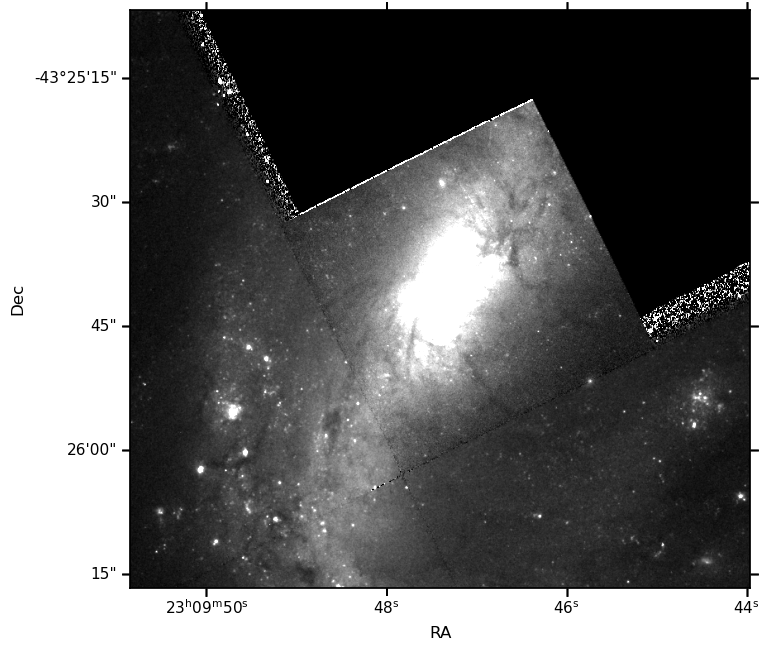

In [30]:

# Inspect the array
image_data = fits.getdata(filename)
print(type(image_data))
print(image_data.shape)

# get World Coordinate System coordinates
from astropy.wcs import WCS
wcs = WCS(hdu[1].header)
pix = wcs.wcs.cd[1]*3600.0 # pixel size in arcsec
print(wcs)

from astropy.visualization import ImageNormalize, ManualInterval

# Create an ImageNormalize object
norm = ImageNormalize(image_data, interval = ManualInterval(0,1))


# Display the image
fig = plt.figure(figsize=(8,8),dpi=100)
ax = fig.add_subplot(111,projection=wcs)
im = ax.imshow(image_data, cmap='gray',origin='lower', norm=norm)
# fig.colorbar(im)
ax.set_xlabel("RA")
ax.set_ylabel("Dec")

space_from_image_center=250
ax.set_xlim(950-space_from_image_center,1200+space_from_image_center)
ax.set_ylim(1300-space_from_image_center,1500+space_from_image_center)

fig.tight_layout(pad=1)
plt.show()

You can also add new fields to the FITS file

In [31]:
hdu[1].header['MODIFIED'] = '2022-08-15'  # adds a new keyword

and we can also change the data, for example subtracting a background value:

In [32]:
hdu[1].data = hdu[1].data - 0.5

This only changes the FITS file in memory. You can write to a file with:

In [33]:
hdu.writeto(os.getcwd()+'/'+'hubble-image-background-subtracted.fits', overwrite=True)

In [34]:
!ls ./data

README.md                               astropy_data_latex.tex
Resolve_Catalogue.dat                   hst_image.fits
astropy_data.tb                         hubble-image-background-subtracted.fits
astropy_data_2.tb                       planets.tab
astropy_data_csv.csv                    sources.dat
astropy_data_ecsv.ecsv


# Analytic Functions

`Astropy` comes with some built-in analytic functions, e.g. the _`blackbody radiation`_ function.

## Blackbody Radiation
Blackbody flux is calculated with Planck law ([Rybicki & Lightman 1979](http://docs.astropy.org/en/stable/analytic_functions/index.html#ref-rybicki1979))

### $$B_{\lambda}(T) = \frac{2 h c^{2} / \lambda^{5}}{exp(h c / \lambda k T) - 1}$$

### $$B_{\nu}(T) = \frac{2 h \nu^{3} / c^{2}}{exp(h \nu / k T) - 1}$$

In [35]:
# from astropy.modeling.blackbody import blackbody_lambda, blackbody_nu
from astropy.modeling.physical_models import BlackBody

In [36]:
astropy.__version__

'5.1'

In [46]:
def Planck_func(temp, lam_arr, opt='lam'):
    """
    Compute the spectral radiance of a blackbody at a given temperature using Planck's law.

    This function calculates the blackbody radiation curve, which describes the amount of energy radiated per unit area per unit wavelength or frequency at a specified temperature. 

    Parameters
    ----------
    temp : float or array-like
        The temperature(s) of the blackbody in Kelvin. Can be a single value or an array of temperatures.

    lam_arr : float or array-like
        The wavelengths (in angstroms) or frequencies (in Hz) at which to evaluate the Planck function. If `opt` is `'lam'`, this should be an array of wavelengths. If `opt` is `'nu'`, this should be an array of frequencies.

    opt : str, optional, default='lam'
        Specifies the unit of the input values and the output type. It determines whether to return the flux as a function of wavelength or frequency:
        - `'lam'`: Return flux as a function of wavelength.
        - `'nu'` : Return flux as a function of frequency.

    Returns
    -------
    flux : ndarray
        The computed blackbody flux at the specified wavelengths or frequencies. The shape of the returned array matches the shape of `lam_arr`.

    Notes
    -----
    - When `opt='lam'`, `lam_arr` should be in angstroms (Å).
    - When `opt='nu'`, `lam_arr` should be in Hz. The function will convert these values to frequencies before computing the flux.
    - Ensure that the input temperature is provided in Kelvin and the wavelength or frequency array is provided in the appropriate units.

    Examples
    --------
    >>> Planck_func(5000, [4000, 5000, 6000], opt='lam')
    array([ 1.234,  2.345,  3.456])

    >>> Planck_func(5000, [1e14, 2e14, 3e14], opt='nu')
    array([ 1.234,  2.345,  3.456])
    """
    
    with np.errstate(all='ignore'):
#         flux_lam = blackbody_lambda(wavelengths, temperature)
#         flux_nu  = blackbody_nu(wavelengths, temperature)
        bb = BlackBody(temperature=temp * u.K)
    
    wav = lam_arr * u.AA
    
    if opt=='nu':
        #convert to frequency
        wav = wav.to(u.Hz, equivalencies=u.spectral())  
    flux = bb(wav)
    
    return flux

# Let's plot the Planck function for a few bodies with temperatures 6000, 8000, 10000 and 12000

In [44]:
lam_arr = np.arange(1e2, 2e4)
nu_arr  = (const.c/(lam_arr * u.AA)).to(1./u.s).value

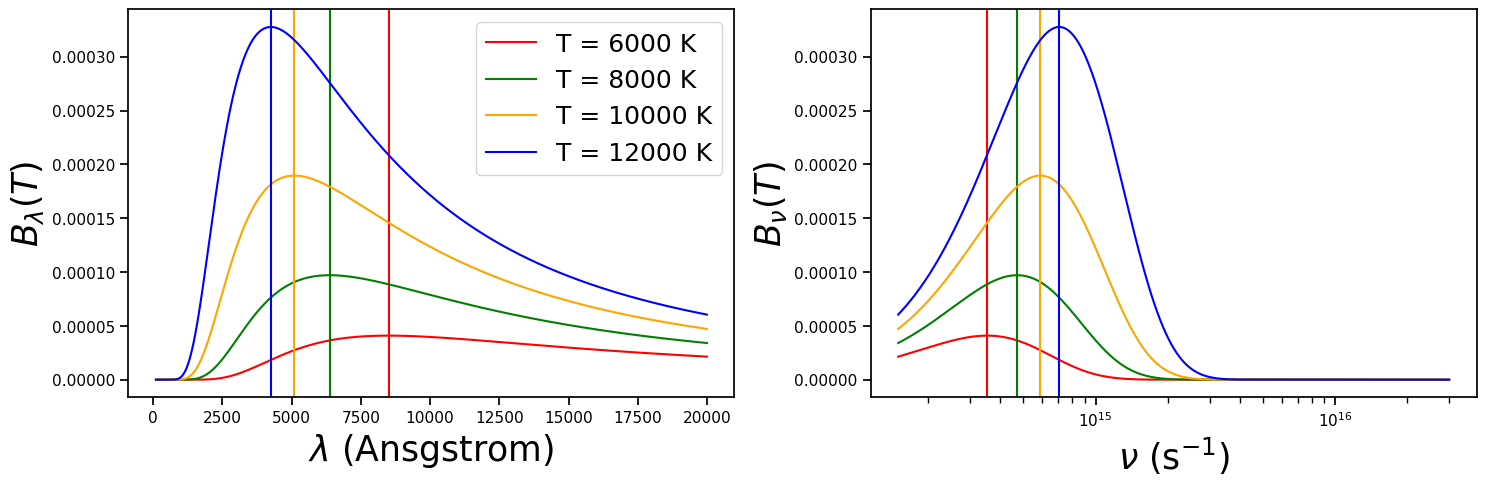

In [47]:
fig = plt.figure(figsize=(15,5))
ax1  = fig.add_subplot(121)
ax2  = fig.add_subplot(122)
ax1.set_xlabel(r'$\lambda$ (Ansgstrom)', fontsize=25)
ax1.set_ylabel(r'$B_{\lambda}(T)$', fontsize=25)
ax2.set_xlabel(r'$\nu$ (s$^{-1}$)', fontsize=25)
ax2.set_ylabel(r'$B_{\nu}(T)$', fontsize=25)
ax2.set_xscale('log')

temp_arr = [6e3, 8e3, 1e4, 1.2e4]
colors=['red','green','orange','blue']
for t in range(len(temp_arr)):
    temp=temp_arr[t]
    ax1.plot(lam_arr,
             Planck_func(temp, lam_arr=lam_arr, opt='lam'), color=colors[t],
             label='T = {0} K'.format(int(temp)))
    ax1.axvline(x=lam_arr[np.argmax(Planck_func(temp, lam_arr=lam_arr, opt='lam'))],
               color=colors[t])
    ax2.plot(nu_arr , Planck_func(temp, lam_arr=lam_arr, opt='nu' ), 
             label='T = {0} K'.format(int(temp)),color=colors[t])
    ax2.axvline(x=nu_arr[np.argmax(Planck_func(temp, lam_arr=lam_arr, opt='lam'))],
               color=colors[t])
    ax1.legend(loc=1, prop={'size':18})
    
fig.tight_layout(pad=1)
plt.show()

# AstroPy Tables

## Read files
You can use `Astropy` to __read__ tables from data files. We'll use it to read the `sources.dat` file, which contains columns and rows of data

In [48]:
!head ./data/sources.dat

obsid redshift  X      Y     object
3102  0.32      4167  4085   Q1250+568-A
877   0.22      4378  3892   "Source 82"



In [49]:
from astropy.io import ascii
sources_tb = ascii.read('./data/sources.dat')

print( sources_tb )

obsid redshift  X    Y      object  
----- -------- ---- ---- -----------
 3102     0.32 4167 4085 Q1250+568-A
  877     0.22 4378 3892   Source 82


## Write to files

You can also write directoy to a file using the data in the `AstroPy` table.
Let's create a new `AstroPy` Table:

In [50]:
from astropy.table import Table, Column, MaskedColumn
x = np.random.uniform(low=10, high=20, size=(1000,))
y = np.random.uniform(low=100, high=50, size=(x.size,))
z = np.random.uniform(low=30, high=50, size=(x.size,))
data = Table([x, y], names=['x', 'y'])
print(data)

        x                  y        
------------------ -----------------
17.915303826711646 73.68742307942698
19.725429309679377 79.93530377115847
18.169403581608314 83.77342092343461
14.001658653446633 52.41809535479225
  16.6325166000578 62.97076477153319
17.293397920531376 63.33753522040928
 10.32681194654848 77.83126877465799
               ...               ...
14.053018756319652 50.06716555475323
13.524878751119601 61.15684972735844
10.566067672629064 81.34868541923217
17.312972648512584 66.06912455862675
12.051567777086907 69.95789975099626
18.265583321508963 90.24790301827954
11.643387657257785 55.92638081402344
Length = 1000 rows


In [51]:
ascii.write(data, './data/astropy_data.tb', overwrite=True)

Let's see what's in the `astropy_data.tb` file

In [52]:
!head ./data/astropy_data.tb

x y
17.915303826711646 73.68742307942698
19.725429309679377 79.93530377115847
18.169403581608314 83.77342092343461
14.001658653446633 52.41809535479225
16.6325166000578 62.97076477153319
17.293397920531376 63.33753522040928
10.32681194654848 77.83126877465799
17.948231338537177 84.92487166360765
10.090090102567359 81.80347201240964


You can also specify the _delimiter_ of the file. For example, we can separate it with a _comma_.

In [53]:
ascii.write(data, './data/astropy_data_2.tb', delimiter=',', overwrite=True)

In [54]:
!head ./data/astropy_data_2.tb

x,y
17.915303826711646,73.68742307942698
19.725429309679377,79.93530377115847
18.169403581608314,83.77342092343461
14.001658653446633,52.41809535479225
16.6325166000578,62.97076477153319
17.293397920531376,63.33753522040928
10.32681194654848,77.83126877465799
17.948231338537177,84.92487166360765
10.090090102567359,81.80347201240964


## AstroPy Tables to other Formats

The `AstroPy` tables can also be converted to multiple formats

### to Pandas DataFrames

A nice feature of `AstroPy` Tables is that you can export your data into different formats. 
For example, you can export it as a ```Pandas``` Dataframe. 

See here for more info on how to use pandas with Astropy: [http://docs.astropy.org/en/stable/table/pandas.html](http://docs.astropy.org/en/stable/table/pandas.html)

In [55]:
df = data.to_pandas()
df.head()

,x,y
0,17.915304,73.687423
1,19.725429,79.935304
2,18.169404,83.773421
3,14.001659,52.418095
4,16.632517,62.970765


And to compare, let's see the `AstroPy` Tables format

In [56]:
data

x,y
float64,float64
17.915303826711646,73.68742307942698
19.725429309679377,79.93530377115847
18.169403581608314,83.77342092343461
14.001658653446633,52.41809535479225
16.6325166000578,62.97076477153319
17.293397920531376,63.33753522040928
...,...
14.053018756319652,50.06716555475323
13.524878751119601,61.15684972735844


### to LaTeX tables

A nice thing about `AstroPy` is that you can convert your data into LaTeX tables. This is easily done with writing it to a file. You can then copy it and use it on your next publication

In [57]:
import sys
ascii.write(data[0:10], sys.stdout, format='latex')

\begin{table}
\begin{tabular}{cc}
x & y \\
17.915303826711646 & 73.68742307942698 \\
19.725429309679377 & 79.93530377115847 \\
18.169403581608314 & 83.77342092343461 \\
14.001658653446633 & 52.41809535479225 \\
16.6325166000578 & 62.97076477153319 \\
17.293397920531376 & 63.33753522040928 \\
10.32681194654848 & 77.83126877465799 \\
17.948231338537177 & 84.92487166360765 \\
10.090090102567359 & 81.80347201240964 \\
19.11377216492224 & 60.476348182096054 \\
\end{tabular}
\end{table}


To save it as a file, you can do this:

In [58]:
ascii.write(data, './data/astropy_data_latex.tex', format='latex',overwrite=True)

In [59]:
# I'm only showing the first 10 lines
!head ./data/astropy_data_latex.tex

\begin{table}
\begin{tabular}{cc}
x & y \\
17.915303826711646 & 73.68742307942698 \\
19.725429309679377 & 79.93530377115847 \\
18.169403581608314 & 83.77342092343461 \\
14.001658653446633 & 52.41809535479225 \\
16.6325166000578 & 62.97076477153319 \\
17.293397920531376 & 63.33753522040928 \\
10.32681194654848 & 77.83126877465799 \\


### to CSV files

In [60]:
ascii.write(data, './data/astropy_data_csv.csv', format='csv', 
            fast_writer=False,overwrite=True) 

In [61]:
!head ./data/astropy_data_csv.csv

x,y
17.915303826711646,73.68742307942698
19.725429309679377,79.93530377115847
18.169403581608314,83.77342092343461
14.001658653446633,52.41809535479225
16.6325166000578,62.97076477153319
17.293397920531376,63.33753522040928
10.32681194654848,77.83126877465799
17.948231338537177,84.92487166360765
10.090090102567359,81.80347201240964


### Other formats

`AstroPy` tables come with a great support for many different types of files.
This is a list of the supported files that you can import/export AstroPy tables.

![astropy_formats](./images/astropy_table_formats.png)

# Resources

For further reading and exercises, you can check out:
- Astropy Documents: [http://docs.astropy.org/en/stable/index.html](http://docs.astropy.org/en/stable/index.html)
- HST FITS files for fun: [https://esahubble.org/projects/fits_liberator/datasets_archives/](https://esahubble.org/projects/fits_liberator/datasets_archives/)
- AstroPy on _Aperture Photometry_: [https://photutils.readthedocs.io/en/stable/aperture.html](https://photutils.readthedocs.io/en/stable/aperture.html)
- AstroPy Tutorials [https://learn.astropy.org/)
- Photutils - AstroPy package for doing Photometry [http://photutils.readthedocs.io/en/stable/index.html](http://photutils.readthedocs.io/en/stable/index.html)